In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.interpolate as si
from scipy import optimize
import matplotlib.pyplot as plt

import sys; sys.path.append("../../")
import pykappa

We define our linear model:
  
$$
y = f(x) = p_1 + p_2 * sin(x)
$$

- Parameters are defined by $\mathbf{P} = [p_1, p_2, \dots, p_m]$
    - Here $\mathbf{P} = [p_1, p_2]$
- Data consist of $n$ points.
    - Here $n = 50$.

[3.04055927 1.8292184 ]


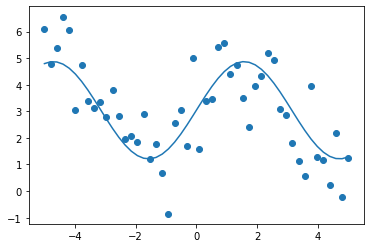

In [2]:
np.random.seed(0)

n = 50
p1 = 2.9
p2 = 1.5
x_data = np.linspace(-5, 5, num=n)
y_data = p1 + p2 * np.sin(x_data) + np.random.normal(size=n)

# Use scipy.optimize.curve_fit
def test_func(x, p1, p2):
  return p1 + p2 * np.sin(x)

init_params = [2, 2]
params, _ = optimize.curve_fit(test_func, x_data, y_data, p0=init_params)
print(params)

plt.scatter(x_data, y_data)
plt.plot(x_data, test_func(x_data, params[0], params[1]))

Write as a linear system of equations for $n$ points:

$$
\left(\begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_i \\ \vdots \\ y_n \end{array} \right)
=
\left(\begin{matrix} 
1 & sin(x_1) \\
1 & sin(x_2) \\
\vdots & \vdots \\
1 & sin(x_i) \\
\vdots & \vdots \\
1 & sin(x_n) \\
\end{matrix} \right)
\left(\begin{array}{c} p_1 \\ p_2 \end{array} \right)
$$

Linear system of equations is:

$$
\mathbf{M} \mathbf{P} = \mathbf{Y}
$$

where $\mathbf{M}$ is the model, $\mathbf{P}$ the parameters and $\mathbf{Y}$ the data.

The least square solution is:

$$
\mathbf{M^T} \mathbf{M} \mathbf{P} = \mathbf{M^T} \mathbf{Y}
\\
\mathbf{P} = (\mathbf{M^T} \mathbf{M})^{-1} \mathbf{M^T} \mathbf{Y}
$$

[3.04055927 1.82921841]


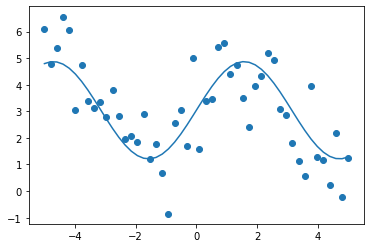

In [14]:
# Solve using manual least square
M = np.stack([np.ones(n), np.sin(x_data)]).T
Y = y_data

MTM = M.T @ M
MTM_INV = np.linalg.inv(MTM)
P = MTM_INV @ M.T @ Y
print(P)

plt.scatter(x_data, y_data)
plt.plot(x_data, test_func(x_data, P[0], P[1]))

In [18]:
# Solve using numpy.linalg.lstsq
np.linalg.lstsq(M, Y, rcond=None)[0]

array([3.04055927, 1.82921841])